# Walk on half-spaces

The aim of this code is to estimate the density of the point of first hit $X_{\tau_S}$ into a sandwich $S=(-1,1)\times \mathbb{R}$, starting from an arbitrary position $x\in \mathbb{R}^2\setminus S$.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.special as scs
from scipy.stats import gausshyper
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd

# Ran for the last time with Python 3.8.16 / anaconda3 environment
# Specs of my computer: MBP M1 8GB RAM 

# This first part only works for $\alpha\in[1,2)$

 Simulating from $X^{(1)}_{\tau_1^{\vee}}$ and $X^{(1)}_{\tau_{-1}^{\wedge}}$ is easy cause Lemma 5.2 states that under $\mathbb{P}_x$, $(r-X_{\tau_r^{\vee}}^{(1)})/(x-X_{\tau_r^{\vee}}^{(1)}) \sim Beta(1-\alpha/2,\alpha/2)$.

For simulating from $X_{\tau_1^{\vee}}^{(2)}|X^{(1)}_{\tau_1^{\vee}}=y^{(1)}$ and $X_{\tau_{-1}^{\wedge}}^{(2)}|X^{(1)}_{\tau_{-1}^{\wedge}}=y^{(1)}$ we notice that by Lemma 5.1 the random variable $X_{\tau_1^{\vee}}^{(2)}|X_{\tau_1^{\vee}}^{(1)}=y^{(1)}$ under $\mathbb{P}_{(x_1,0)}$ has a Cauchy distribution with the following density (with respect to $\mathrm{d}y^{(2)}$) $$\frac{|x^{(1)}-y^{(1)}|}{\pi\left[(x^{(1)}-y^{(1)})^2+|y^{(2)}|^2 \right]}$$

In [2]:
# The following function simulates from $X_{\tau_r^{\wedge \vee}}$

# Notice that x>r if halfspace="lower" and x<r if halfspace ="upper" 
def simulate(x,alpha=0.9, r=1,n=1,halfspace="upper"):
    t = scipy.stats.beta.rvs(1-alpha/2, alpha/2, size=n)
    if halfspace=="upper":
         y1 = (r-t*x)/(1-t) 
    else: 
         y1 = (t*x-r)/(t-1) # they are the same transform! 
    y2 = np.multiply(abs(x-y1),scipy.stats.cauchy.rvs(0,1,size=n))
    return(y1,y2)


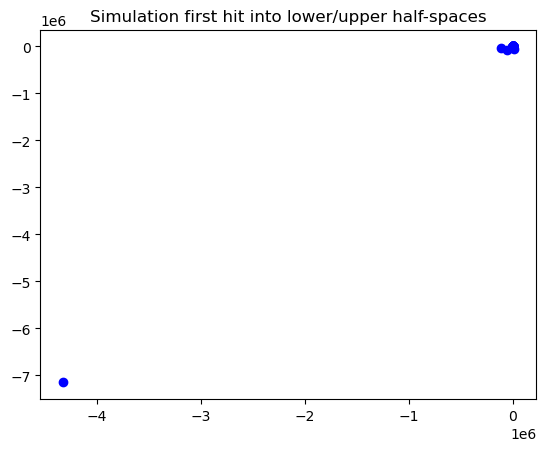

In [3]:
# testing the function on the lower half-space

sim = simulate(x=1,alpha=0.9,r=0,n=100,halfspace="lower")
plt.plot(sim[1],sim[0],'bo')
plt.title("Simulation first hit into lower/upper half-spaces")
plt.show()


### Implementing the Walk on half-spaces

In [ ]:
n = 5000000 # number of simulations # This takes like 11 mins for combination of parameters

x1v = [1.3,2] # vector of initial positions in the first coordinate
alpv = [1.1,1.7] # vector of alphas to compare

for x1 in x1v:
    for alp in alpv:

        y1 = np.zeros(n)
        y2 = np.zeros(n)
        Ncross = np.zeros(n) # Number of necessary crossings for every hit into the strip

        for i in range(0,n):
            y1[i],y2[i] = simulate(x=x1,alpha=alp,r=1,n=1,halfspace="lower")
            while ( y1[i]>1 or y1[i]< -1 ) and Ncross[i]<500:
                Ncross[i] = Ncross[i] +1
                aux1 , aux2 = 0, 0 # auxiliar variables where we store iterations
                if y1[i]< -1:
                    aux1,aux2 = simulate(x=y1[i],alpha=alp,r=-1,n=1,halfspace="upper")
                else:
                    aux1,aux2 = simulate(x=y1[i],alpha=alp,r=1,n=1,halfspace="lower")
                y1[i]= aux1 
                y2[i]=y2[i]+aux2
            #if Ncross[i] >0:
                #print("The ",i,"-th simulation required",Ncross[i]," iterations of resampling")
# Saving the big samples for the different combination of parameters
        np.save(str("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/firstcoord_alp_"+str(alp)+"x1_"+str(x1)),y1)
        np.save(str("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/secondcoord_alp_"+str(alp)+"x1_"+str(x1)),y2)


In [4]:
# Load the samples in case you had already simulated them
x1a = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/firstcoord_alp_1.1x1_1.3.npy")
x2a = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/secondcoord_alp_1.1x1_1.3.npy")
x1b = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/firstcoord_alp_1.1x1_2.npy")
x2b = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/secondcoord_alp_1.1x1_2.npy")
x1c = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/firstcoord_alp_1.7x1_1.3.npy")
x2c = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/secondcoord_alp_1.7x1_1.3.npy")
x1d = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/firstcoord_alp_1.7x1_2.npy")
x2d = np.load("/Users/sonnymedina/Library/Mobile Documents/com~apple~CloudDocs/samba cloud/walk on halfspaces/samples_wohs/secondcoord_alp_1.7x1_2.npy")


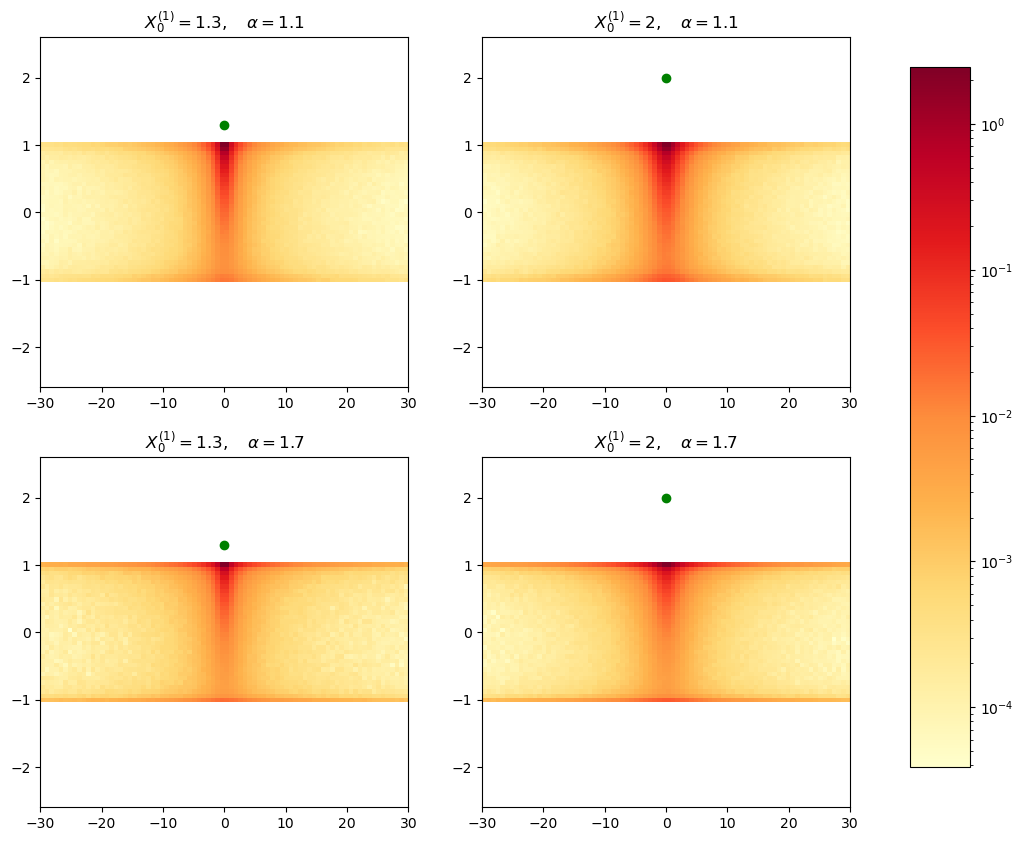

In [52]:
# Plotting the 4 2d histograms
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))

axlist = [ax1,ax2,ax3,ax4]

ax1.hist2d(x2a, x1a, norm=mpl.colors.LogNorm(),cmap= 'YlOrRd', bins=80,range = [[-30,30],[-2.6,2.6]], density=True)
ax1.plot(0,1.3,color='green', marker='o')
ax1.title.set_text(r"$X^{(1)}_0=1.3,\quad \alpha=1.1$")

ax2.hist2d(x2b, x1b, norm=mpl.colors.LogNorm(),cmap= 'YlOrRd', bins=80,range = [[-30,30],[-2.6,2.6]], density=True)
ax2.plot(0,2,color='green', marker='o')
ax2.title.set_text(r"$X^{(1)}_0=2,\quad \alpha=1.1$")

ax3.hist2d(x2c, x1c, norm=mpl.colors.LogNorm(), cmap= 'YlOrRd', bins=80,range = [[-30,30],[-2.6,2.6]], density=True)
ax3.plot(0,1.3,color='green', marker='o')
ax3.title.set_text(r"$X^{(1)}_0=1.3,\quad \alpha=1.7$")

im=ax4.hist2d(x2d, x1d, norm=mpl.colors.LogNorm(), cmap= 'YlOrRd', bins=80,range = [[-30,30],[-2.6,2.6]], density=True)
ax4.plot(0,2,color='green', marker='o')
ax4.title.set_text(r"$X^{(1)}_0=2,\quad \alpha=1.7$")


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]
fig.colorbar(im[3], cax=cbar_ax)
#plt.savefig("4histogramsViridis.png") # Viridis is colorblind-friendly
plt.savefig("4 histograms YlOrRd.pdf",format="pdf")
plt.show()

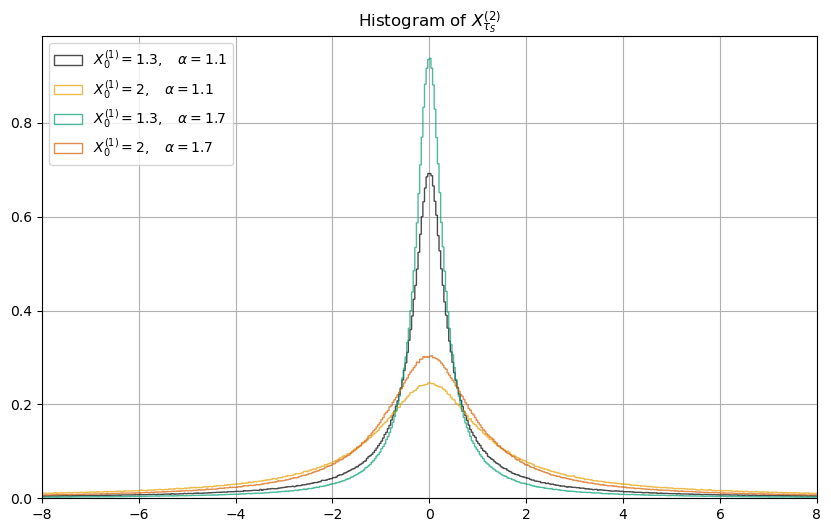

In [50]:
# Marginal histogram of the second coordinate
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x2a, bins=600, range=[-10,10],histtype='step', density=True, color='skyblue', alpha=0.7, edgecolor='black')
ax.hist(x2b, bins=600, range=[-10,10],histtype='step', density=True, color='skyblue', alpha=0.7, edgecolor='#E69F00')
ax.hist(x2c, bins=600, range=[-10,10],histtype='step', density=True, color='skyblue', alpha=0.7, edgecolor='#009E73')
ax.hist(x2d, bins=600, range=[-10,10],histtype='step', density=True, color='skyblue', alpha=0.7, edgecolor='#D55E00')
plt.title(str("Histogram of "+r"$X^{(2)}_{\tau_S}$"))
labels = (r"$X^{(1)}_0=1.3,\quad \alpha=1.1$",r"$X^{(1)}_0=2,\quad \alpha=1.1$",r"$X^{(1)}_0=1.3,\quad \alpha=1.7$",r"$X^{(1)}_0=2,\quad \alpha=1.7$")
ax.legend(labels,loc="upper left")
plt.xlim(-8,8)
plt.grid()
plt.savefig("Marginal histogram2.pdf",format="pdf")
plt.show()


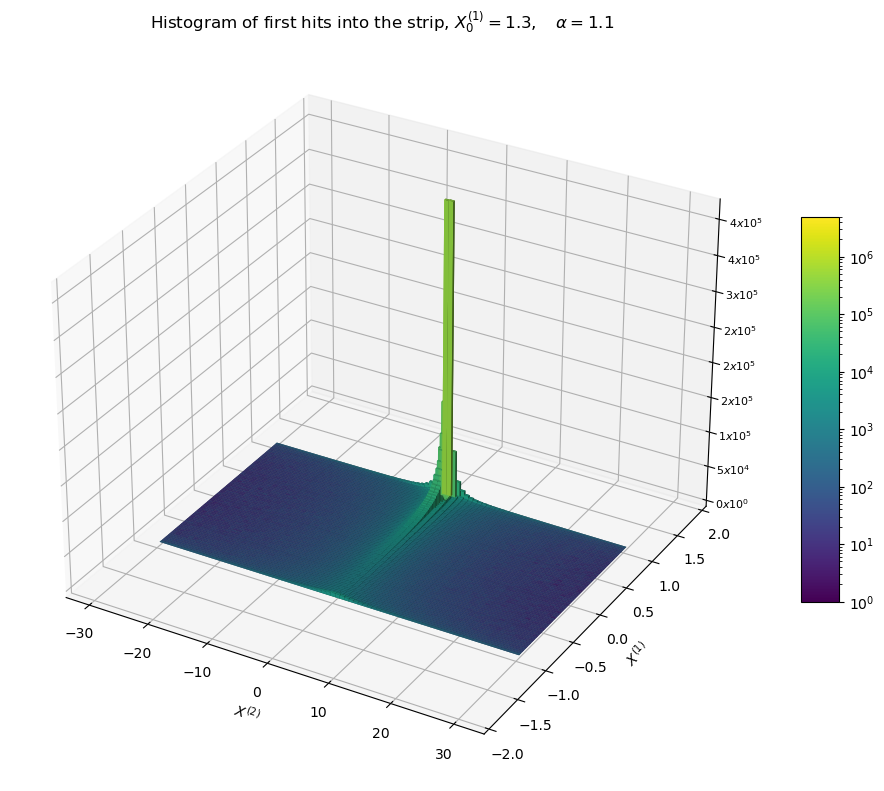

In [154]:
from matplotlib.ticker import ScalarFormatter

# 3D histogram

fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(111, projection='3d')
#ax.view_init(azim=0, elev=90)

# plotting region
xmin = -1
xmax = 1
ymin = -30
ymax = 30

# Somehow the yedges and xedges are swapped in the np.histogram2d function
hist, yedges, xedges = np.histogram2d(x1a, x2a, bins=80, range = [[xmin, xmax], [ymin, ymax]], density=False)
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
# the following command takes the middle point multiplied by two of the edges in the x axis and y axis and substracts a correction term, which I will omit 
xpos, ypos = np.meshgrid((xedges[:-1]+xedges[1:]), (yedges[:-1]+yedges[1:])) #-(xedges[1]-xedges[0])

xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

norm = mpl.colors.LogNorm(vmin=1, vmax=n)
colors_map = plt.cm.viridis(norm(dz))

# Plot the bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors_map, shade=True)

# Plot the vertical color bar 
mappable = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
mappable.set_array(dz)
plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)

def y_fmt(x, y):
 return '${:2.0e}'.format(x).replace('e+0', 'x10^{')+'}$'
ax.zaxis.set_major_formatter(mpl.ticker.FuncFormatter(y_fmt))
ax.tick_params(axis='z', labelsize=8)

plt.title(str("Histogram of first hits into the strip, "+r"$X^{(1)}_0=1.3,\quad \alpha=1.1$"))
plt.ylim(-2,2)
plt.xlabel(r"$X^{(2)}$")
plt.ylabel(r"$X^{(1)}$")
#plt.savefig("3dbars.pdf",format="pdf")
plt.show()


In [ ]:
# Average number of crossings across half-spaces to enter the strip
np.mean(1+Ncross)

In [ ]:
# simple scatter of the hits 
plt.plot(y2,y1,'bo',alpha=0.1)
plt.xlim(-1000,1000)
plt.title("Scatter plot of the simulated points inside the strip")
plt.show()

In [ ]:
# Barplot of the number of crossings to enter the strip
unique, counts = np.unique(1+Ncross, return_counts=True)
unique, counts
plt.bar(unique,counts/n)
plt.title("Histogram of the number of crossings until hitting the strip")
plt.xlabel("N")
plt.ylabel("Frequency")
plt.show()

# Second part: $\alpha\in (0,1)$ and conditioned processes

$X^{(1)}_{\tau_1^{\vee}}|X^{(1)}_{\tau_1^{\vee}}\in (0,1)\sim GH(\alpha,1-\alpha/2,1,-1/x^{(1)})$

In [ ]:
alpha=0.7
x_1=1.3

fig, ax = plt.subplots(1, 1)
x = np.linspace(gausshyper.ppf(0.01, alpha, 1-alpha/2, 1, -1/x_1),
                gausshyper.ppf(0.99, alpha, 1-alpha/2, 1, -1/x_1), 100)
ax.plot(x, gausshyper.pdf(x, alpha, 1-alpha/2, 1, -1/x_1),'r-', lw=1, alpha=0.6)
plt.title("Density of the random variable above")
plt.show()

In [ ]:
rvs = gausshyper.rvs(alpha, 1-alpha/2, 1, -1/x_1,size=1000)

plt.hist(rvs)
plt.title("Histogram of the simulation of size 1000, attentioin in the processing time :S")
plt.show()

Now, if $Y=[X^{(1)}_{\tau_1^{\vee}}|X^{(1)}_{\tau_1^{\vee}}\in (-\infty,0)]$ then $$Z:=\frac{1}{1-Y}\sim GH(1-\alpha/2,\alpha,1,(x^{(1)}-1)).$$
Hence, to simulate from $Y$ we simulate and transform $Y=1-\frac{1}{Z}$.

In [ ]:
rvs_z = gausshyper.rvs(1-alpha/2, alpha, 1, x_1-1,size=1000)
y_cond = (rvs_z-1)/rvs_z
plt.hist(y_cond)
plt.title("Simulations of the first hit below 1 that went below 0")
plt.show()

In [ ]:
plt.hist(y_cond[y_cond>-1000])
plt.title("Same thing but removing the really low values")
plt.show()

## Walk on half-spaces under $\mathbb{P}^{\circ}$

In [ ]:
# Notice that x>r if halfspace="lower" and x<r if halfspace ="upper" 
# wlog we start with x>1 so the first simulation must be halfspace="lower"

x = 1.7
alpha=0.7


def simulatePcirc(x,alpha=0.9, r=1,n=1,halfspace="lower"):
    if halfspace=="lower":
          p01 = (x**(-alpha)*(x-1)**(alpha/2)*scs.gamma(alpha))/(scs.gamma(1+alpha/2)*scs.gamma(alpha/2))*\
               scs.hyp2f1(1,alpha,1+alpha/2,1/x)
          if scipy.stats.bernoulli.rvs(p=p01,size=1)==1:
               y1 = gausshyper.rvs(alpha, 1-alpha/2, 1, -1/x,size=1)
          else:
               t = gausshyper.rvs(1-alpha/2, alpha, 1, x-1,size=1)
               y1 = 1-(1/t) 
    else: 
          pm10 = ((-x)**(-alpha)*(-1-x)**(alpha/2)*scs.gamma(alpha))/(scs.gamma(1+alpha/2)*scs.gamma(alpha/2))*\
               scs.hyp2f1(1,alpha,1+alpha/2,-1/x)
          if scipy.stats.bernoulli.rvs(p=pm10,size=1)==1:
               y1 = -gausshyper.rvs(alpha, 1-alpha/2, 1, 1/x,size=1)
          else:
               t = gausshyper.rvs(1-alpha/2, alpha, 1, -x-1,size=1) # There was a sign mistake here! I had written -(x-1) instead of -x-1
               y1 = (1/t)-1      
    return(y1)


In [ ]:
y1_sample = np.zeros(1000)
for i in range(0,1000):
    y1_sample[i] = simulatePcirc(1.8,alpha=0.9, r=1,n=1,halfspace="lower")

plt.hist(y1_sample)
plt.title("Histogram of the first hit below 1 under P circ")
plt.show()

In [ ]:
plt.hist(y1_sample[y1_sample>-100],bins=10,density=True)
plt.title("Histogram of the first hit below 1 under P circ")
plt.show()

In [ ]:
# Walk on half-spaces for alpha in (0,1)
n = 10000 # number of simulations. The simulation time is considerably higher
x1 = 1.8
alp = 0.5   
y1 = np.zeros(n)
y2 = np.zeros(n)

for i in range(0,n):
    y1[i]=simulatePcirc(x=x1,alpha=alp,r=1,n=1,halfspace="lower")
    bigjumps=0
    disty1 = y1[i]-x1
    while ( y1[i]>1 or y1[i]< -1 ) and bigjumps<100000:
        bigjumps = bigjumps +1
        aux1 = 0  # auxiliar variables where we store the extra vertical jumps
        if y1[i]< -1:
            aux1 = simulatePcirc(x=y1[i],alpha=alp,r=-1,n=1,halfspace="upper")
            disty1 = disty1 + (aux1-y1[i])
        else:
            aux1 = simulatePcirc(x=y1[i],alpha=alp,r=1,n=1,halfspace="lower")
            disty1 = disty1 + (y1[i]-aux1)
        y1[i]= aux1 
    if bigjumps >0:
         print("The ",i,"-th simulation required",bigjumps," iterations of resampling")
    y2[i] = disty1 * scipy.stats.cauchy.rvs(0,1,size=1) 


In [ ]:
plt.hist(y2)
max(y2)

In [ ]:
plt.plot(y2,y1,'bo')
plt.xlim(-200,200)

In [ ]:
fig, ax = plt.subplots(1, 1)
alp = 0.8
x = np.linspace(1,
                100, 100)
ax.plot(x, scs.betainc(1-alp/2,alp,(2/(x+1))),'r-', lw=1, alpha=0.6)
plt.title("probability of hitting the sandwich in the first crossing")
plt.xlabel("x^{(1)}")
plt.show()

### To correctly visualise the previous simulations we need to correct by the $h$-transform